In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
#read data
df= pd.read_csv("F:/ML/Git ML/TwitterDataAnalysis/sm.csv")
df

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
5,2006,F,NaN,142,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,2006,F,18.930,72,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
7,2006,M,18.322,17,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2006,F,19.055,52,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2006,F,18.708,39,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
#preprocessing
#getting the list of columns with nan
ml= df.columns[df.isna().any()].tolist()
ml

['gender', 'age']

In [6]:
dfm=df #making another datframe
#getting the ratio of the index labels
val =pd.DataFrame(df['gender'].value_counts(normalize=True))
print ("The probability ratio before filling the missing values in gender is" )
print (df['gender'].value_counts(normalize=True))
#index labels in a list
valr = val.index.tolist()
#drc.index = valr
#columns values in a list
valc =val['gender'].tolist()
#replacing the nan values with ratio
dfm['gender'] = dfm['gender'].fillna(pd.Series(np.random.choice(valr,p=valc, size=len(dfm))))
print ("The probability ratio after filling the missing vlaues in gender is" )
print ((dfm['gender'].value_counts(normalize=True)))

The probability ratio before filling the missing values in gender is
F    0.80855
M    0.19145
Name: gender, dtype: float64
The probability ratio after filling the missing vlaues in gender is
F    0.8077
M    0.1923
Name: gender, dtype: float64


In [7]:
#distribution of the age data
dfm.loc[:,"age"].describe()

count    24914.000000
mean        17.993950
std          7.858054
min          3.086000
25%         16.312000
50%         17.287000
75%         18.259000
max        106.927000
Name: age, dtype: float64

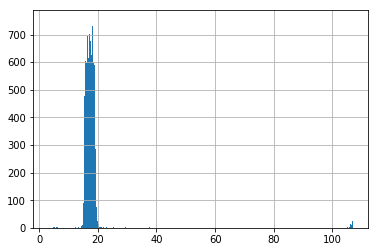

In [8]:
#histogram of the age data 
dfm.loc[:,"age"].hist(bins=1000)

In [9]:
#eliminating the outliers
for item in dfm.loc[:,"age"]:
    if item >20.5:
        dfm.loc[:,"age"].replace(item, np.nan, inplace=True)
    elif item <14.75:
        dfm.loc[:,"age"].replace(item, np.nan, inplace=True)
    print (item)

18.982
18.801
18.335
18.875
18.995
nan
18.93
18.322
19.055
18.708
18.543
19.463
18.097
nan
18.398
nan
nan
18.987000000000002
17.158
18.497
18.738
19.296
18.752
19.035999999999998
19.039
19.02
nan
18.426
19.266
18.278
18.793
18.524
18.683
19.072
8.383
17.906
19.053
18.908
nan
19.28
18.324
nan
18.089000000000002
19.343
18.697
19.239
18.355
18.787
18.894000000000002
nan
18.809
18.576
19.159000000000002
19.526
18.782
18.935
18.374000000000002
18.924
19.053
18.976
18.984
18.85
18.71
18.207
18.018
19.107
18.201
18.565
nan
18.855999999999998
106.686
nan
18.102999999999998
19.217
nan
18.56
18.335
18.787
84.15899999999999
33.593
19.359
18.557000000000002
nan
18.85
19.28
19.359
18.355
18.735
18.942999999999998
18.335
18.793
19.014
18.634
nan
nan
18.396
18.261
nan
18.73
19.149
18.459
18.385
nan
18.825
19.217
19.077
18.713
18.667
18.809
18.825
18.836
nan
19.718
19.017
nan
18.68
19.255
18.409000000000002
18.852999999999998
17.199
18.59
19.006
18.064
18.612000000000002
18.430999999999997
18.675
18.3

18.615
15.085999999999999
nan
18.798
18.275
18.379
nan
nan
18.116
18.261
18.453
nan
nan
18.76
18.349
18.475
19.567
18.875
18.887999999999998
18.743
18.396
19.409000000000002
nan
19.143
19.721
18.349
17.029
18.324
19.061
18.491
nan
nan
18.858
nan
19.277
18.567999999999998
18.776
19.105
18.951
18.861
18.133
17.982
18.823
nan
nan
17.936
18.899
19.053
18.412
18.516
19.064
18.88
18.42
18.746
18.76
18.371
19.094
nan
18.344
19.967
18.223
18.757
19.066
nan
16.115
19.121
nan
18.697
18.346
18.68
18.285999999999998
18.563
18.475
18.708
18.535
19.11
18.338
18.363
18.71
18.412
19.324
19.206
19.483
18.248
nan
19.05
19.351
19.064
18.212
18.784000000000002
18.855999999999998
16.925
18.793
19.090999999999998
nan
nan
18.801
18.340999999999998
18.570999999999998
18.264
18.867
19.028
nan
18.727
18.311
18.686
19.135
18.430999999999997
18.541
18.519000000000002
18.565
18.787
18.809
19.149
nan
19.584
18.018
nan
nan
19.242
18.59
18.987000000000002
18.743
18.916
18.24
18.554000000000002
18.442
18.713
18.842
17

18.899
18.973
18.579
18.617
19.34
18.79
nan
20.304000000000002
19.075
18.393
nan
18.289
nan
18.16
18.461
18.623
nan
19.173
18.344
18.524
nan
18.746
nan
19.053
nan
18.817
18.727
18.163
nan
18.637
nan
19.066
19.121
18.533
nan
18.971
nan
18.776
nan
18.852999999999998
18.887999999999998
18.396
18.346
18.757
19.409000000000002
19.409000000000002
18.477999999999998
nan
19.225
18.71
18.409000000000002
18.99
nan
17.963
18.927
18.686
18.628
18.897000000000002
18.502
18.275
18.721
nan
18.136
18.768
18.171
18.968
nan
18.289
19.22
18.601
18.230999999999998
18.71
18.294
18.59
19.179000000000002
18.869
19.180999999999997
19.283
18.305
19.455
18.587
nan
19.083
19.118
18.423
19.461
19.165
18.916
18.705
19.313
nan
18.623
nan
18.428
14.53
18.579
19.157
18.683
19.179000000000002
18.752
nan
18.634
18.765
18.908
19.320999999999998
nan
nan
nan
18.182000000000002
18.96
18.593
18.598
18.340999999999998
18.872
nan
nan
18.894000000000002
19.034000000000002
18.738
18.418
18.831
18.91
18.418
18.212
19.09099999999

18.248
19.491
18.352
nan
18.472
18.237000000000002
18.486
18.393
17.191
nan
18.762
19.187
19.227999999999998
25.406999999999996
18.075
18.653
18.48
nan
18.428
18.639
18.415
19.230999999999998
18.428
nan
22.932
18.823
18.137999999999998
19.031
18.987000000000002
18.037
18.809
nan
18.524
18.434
17.969
19.225
17.314
18.801
18.694000000000003
19.611
18.516
18.834
18.916
19.57
18.42
nan
18.398
18.237000000000002
18.601
18.845
18.598
18.998
nan
18.924
19.061
18.609
nan
19.151
18.234
19.154
18.839000000000002
18.702
18.412
17.448
19.180999999999997
18.209
18.105
nan
18.938
18.68
19.025
18.412
18.76
nan
18.574
19.102
18.401
19.578
18.847
18.847
18.576
18.973
17.979
nan
18.512999999999998
19.014
19.039
18.346
18.861
17.99
18.292
18.691
18.554000000000002
18.570999999999998
nan
18.648
18.691
19.389
18.639
19.488
18.801
18.667
18.804000000000002
19.452
nan
19.159000000000002
18.721
18.891
18.344
18.96
18.215
nan
18.732
18.430999999999997
18.477999999999998
18.845
18.489
18.815
nan
nan
18.574
18.7

18.942999999999998
19.003
18.428
18.267
nan
18.634
18.3
nan
18.615
18.579
18.285999999999998
18.379
18.875
18.428
18.111
18.836
nan
18.409000000000002
19.14
18.486
19.4
nan
18.973
nan
18.445
18.839000000000002
18.672
18.804000000000002
18.919
18.415
nan
18.954
19.113
18.324
18.973
18.705
18.894000000000002
nan
18.344
14.962
nan
18.305
18.415
18.218
18.754
18.825
18.22
18.245
nan
18.809
19.737000000000002
19.124000000000002
19.332
18.574
18.177
18.825
18.324
18.825
18.157
18.669
18.669
18.168
19.066
19.017
19.132
18.363
19.031
nan
19.354
18.375999999999998
18.340999999999998
nan
nan
nan
18.65
18.546
18.319000000000003
18.327
18.637
18.951
18.719
18.552
19.075
18.355
18.672
18.519000000000002
18.708
18.834
18.188
19.343
19.695999999999998
18.995
18.459
18.576
18.489
18.88
18.374000000000002
18.357
18.237000000000002
17.58
18.962
18.533
nan
18.067
19.165
nan
nan
19.034000000000002
18.749000000000002
18.508
19.8
nan
19.351
19.012
19.198
18.344
18.971
18.404
18.916
18.935
19.198
18.88
18.28

17.791
17.552
17.766
17.399
17.703
17.073
17.561
17.722
17.851
17.243
18.037
17.922
17.769000000000002
17.462
17.467
18.064
17.969
17.413
17.706
17.826
18.07
17.979
18.19
16.994
17.820999999999998
21.919
18.141
17.495
17.572
18.615
17.791
17.676
17.355
18.171
nan
18.023
15.120999999999999
17.927
17.884
nan
17.457
17.979
17.84
17.539
17.717
17.791
17.195999999999998
17.535999999999998
17.582
18.073
nan
17.049
17.820999999999998
17.405
17.191
17.785
nan
17.615
nan
18.146
17.363
17.656
18.149
17.982
17.843
17.933
19.294
17.539
17.442999999999998
17.717
17.892
17.73
17.476
18.081
17.788
20.865
17.637
18.168
17.762999999999998
14.225999999999999
17.676
16.969
nan
17.572
nan
17.834
17.61
17.711
18.374000000000002
17.511
17.76
17.58
16.635
17.287
20.067999999999998
18.272000000000002
17.665
nan
nan
18.086
17.588
nan
17.292
17.284000000000002
16.988
17.492
18.108
17.363
17.582
18.026
17.38
18.24
18.122
17.32
18.037
17.415
17.659000000000002
nan
17.807000000000002
17.820999999999998
nan
17.692


18.355
17.676
17.314
17.574
17.473
17.084
nan
17.369
17.539
18.127
17.621
17.503
18.045
17.815
17.632
17.01
17.55
17.413
17.55
17.268
18.316
nan
17.859
nan
nan
nan
nan
18.212
18.226
17.358
17.862000000000002
18.305
nan
17.268
17.654
18.218
17.522000000000002
17.385
17.593
17.708
17.489
18.285999999999998
18.218
17.985
17.322
17.859
17.766
18.242
17.387999999999998
17.405
17.817999999999998
17.771
18.357
18.430999999999997
17.227
nan
nan
17.749000000000002
18.141
17.632
17.892
17.618
17.684
17.643
17.725
17.366
19.565
17.498
17.848
17.796
nan
17.563
16.965999999999998
16.997
17.793
17.279
17.054000000000002
17.708
18.442
18.24
17.191
16.994
nan
17.572
nan
17.820999999999998
17.845
17.432000000000002
17.128
nan
18.223
17.993
17.084
18.387
nan
17.44
17.758
nan
18.166
17.812
17.232
17.250999999999998
nan
nan
nan
nan
17.637
17.415
nan
17.577
nan
17.758
17.807000000000002
17.593
17.509
nan
18.209
17.859
17.563
nan
17.347
17.588
17.355
16.865
nan
nan
17.884
18.073
nan
17.342
17.484
17.347
17.

17.81
17.41
17.476
17.331
16.991
nan
17.062
17.766
17.125
17.645
17.645
17.442999999999998
17.5
17.878
17.933
18.552
17.328
18.357
17.744
nan
18.067
17.303
18.13
17.684
17.32
17.467
17.889
17.477999999999998
17.073
nan
nan
nan
17.952
17.925
17.766
17.374000000000002
17.61
17.843
17.834
17.741
17.903
17.544
17.725
18.023
17.535999999999998
17.897000000000002
17.238
nan
17.426
18.007
nan
17.396
17.55
17.514
nan
17.867
17.131
nan
nan
18.073
18.155
18.102999999999998
17.205
18.026
nan
17.771
17.528
17.109
18.171
17.114
nan
18.587
18.01
17.480999999999998
17.498
17.717
17.484
17.5
17.837
17.958
18.055999999999997
17.426
18.055999999999997
17.719
17.426
17.202
17.445999999999998
nan
17.309
17.112000000000002
17.771
17.859
17.164
18.122
nan
17.785
18.278
17.268
17.372
18.179000000000002
17.41
17.32
17.81
17.528
17.183
nan
18.686
17.947
nan
17.328
16.969
17.372
nan
18.363
nan
nan
17.480999999999998
17.477999999999998
18.305
17.563
18.146
18.237000000000002
17.221
17.785
17.177
17.689
18.078
17

17.399
17.903
17.5
17.855999999999998
17.492
17.429000000000002
17.166
18.283
nan
nan
18.029
17.311
nan
17.514
17.799
18.144000000000002
nan
nan
nan
17.52
18.256
17.511
18.24
17.273
18.387
17.355
17.793
17.969
17.955
17.965999999999998
nan
13.544
17.812
nan
17.528
17.317
17.722
17.254
nan
17.391
17.101
nan
18.053
18.000999999999998
17.695
17.99
17.445999999999998
17.41
17.465
16.991
17.073
16.769000000000002
17.276
17.845
nan
18.209
17.73
17.87
17.396
17.185
4.309
17.634
18.335
18.275
18.137999999999998
18.084
95.09100000000001
17.817999999999998
18.045
17.706
17.506
18.333
nan
17.695
17.832
nan
20.923000000000002
nan
17.875
17.303
18.075
18.22
18.456
17.503
17.287
17.125
18.007
17.906
17.993
17.596
17.451
17.733
nan
17.53
17.284000000000002
17.3
17.448
17.133
17.596
17.629
17.662
18.283
17.955
nan
17.788
nan
16.917
18.078
nan
17.405
17.442999999999998
17.3
nan
17.634
17.916
17.947
105.191
17.87
18.048
nan
17.295
17.892
17.736
17.837
17.618
18.012
18.037
17.791
18.075
18.426
nan
18.168

18.185
17.435
17.495
17.498
17.369
17.311
17.405
17.936
17.979
17.96
17.522000000000002
17.52
17.625999999999998
17.383
18.021
nan
17.569000000000003
18.322
17.489
17.442999999999998
nan
17.305999999999997
18.07
17.522000000000002
17.566
17.599
17.651
17.73
18.754
17.873
nan
17.421
18.215
17.04
18.015
17.533
18.242
19.149
nan
17.5
17.421
18.023
17.279
18.261
17.087
17.160999999999998
17.213
17.793
17.506
17.511
17.205
17.793
17.451
nan
17.079
17.084
17.875
17.651
17.561
17.834
17.311
17.38
17.224
18.582
17.517
17.311
18.338
18.073
nan
17.889
18.53
nan
18.204
nan
nan
18.021
17.667
17.442999999999998
17.762999999999998
nan
13.577
17.459
17.788
18.059
17.873
17.574
17.96
18.146
17.331
17.834
18.423
nan
18.363
nan
17.947
nan
17.755
17.843
17.974
nan
17.645
17.394000000000002
17.855999999999998
17.44
17.843
17.788
18.163
17.418
17.317
17.369
18.168
nan
17.125
nan
18.223
17.922
17.802
17.643
17.829
17.862000000000002
18.212
nan
17.777
18.055999999999997
17.593
17.361
17.949
17.588
17.52
17.8

17.227
17.105999999999998
16.578
16.849
16.747
17.32
17.697
16.767
16.676
16.756
16.972
16.695
16.515
16.189
16.654
17.166
16.005
17.136
16.422
16.923
16.914
16.523
nan
nan
17.845
17.284000000000002
16.739
16.964000000000002
17.235
17.958
16.339000000000002
16.695
16.364
16.906
nan
16.668
16.553
nan
17.160999999999998
16.298
nan
16.509
16.923
18.067
17.24
16.975
nan
17.298
16.857
16.203
16.375
16.903
16.293
17.112000000000002
25.273000000000003
17.32
16.912
16.671
16.81
16.43
17.205
16.329
16.676
16.663
16.027
17.229
16.692999999999998
16.999000000000002
nan
17.109
16.339000000000002
16.758
17.555
16.512
17.153
16.055
16.389
17.160999999999998
16.312
17.114
17.618
16.246
16.452
16.534000000000002
16.537
17.577
nan
17.96
16.778
16.917
nan
16.747
16.775
17.183
16.46
17.566
16.452
16.797
16.797
16.925
16.49
16.709
16.352999999999998
nan
16.342
nan
16.730999999999998
16.329
16.381
17.213
16.594
17.095
17.117
16.172
16.545
16.739
16.531
16.936
16.203
16.882
16.832
16.542
16.624000000000002


16.355999999999998
16.646
nan
17.147000000000002
16.383
16.914
nan
16.452
16.608
16.334
nan
nan
16.704
16.945
17.105999999999998
16.98
16.534000000000002
17.133
18.683
18.081
16.819000000000003
16.942
16.641
16.715
16.134
16.843
16.433
nan
nan
16.687
16.986
16.86
16.827
16.553
16.424
nan
16.641
nan
17.311
16.879
16.485
16.301
16.824
16.548
nan
18.146
16.641
16.682000000000002
nan
17.596
16.312
16.767
17.202
16.747
16.602
16.457
16.86
17.243
16.534000000000002
16.799
77.503
17.265
nan
nan
16.317999999999998
16.352999999999998
16.249000000000002
16.824
17.177
16.397000000000002
16.567
16.444000000000003
16.419
16.517
13.886
18.22
nan
16.956
17.081
16.715
16.986
nan
17.207
nan
16.895
nan
nan
16.589000000000002
16.753
16.646
16.98
16.930999999999997
nan
17.188
16.416
16.145
16.375
nan
nan
17.109
17.024
17.205
17.194000000000003
17.054000000000002
16.6
nan
16.392
17.012999999999998
16.663
17.079
16.975
16.474
16.739
nan
18.585
17.076
19.006
16.359
16.085
16.575
nan
16.727999999999998
16.454

17.024
16.89
17.024
16.698
17.07
16.457
16.813
17.361
16.468
16.840999999999998
nan
17.344
nan
16.548
nan
16.463
nan
16.799
16.92
16.419
16.657
16.879
nan
16.115
17.158
16.208
16.567
16.323
16.559
16.315
17.303
16.965999999999998
16.6
16.408
17.762999999999998
16.835
16.225
16.019000000000002
16.727999999999998
16.496
16.238
17.177
16.641
16.646
16.433
16.561
17.109
17.227
nan
16.657
16.452
16.419
16.887
18.125
16.364
16.564
16.235
16.070999999999998
16.939
16.862000000000002
16.865
16.727999999999998
nan
16.895
16.589000000000002
17.424
16.408
17.202
16.772000000000002
nan
16.939
16.698
17.281
16.315
16.457
16.58
17.205
16.575
16.496
16.898
16.586
16.778
16.534000000000002
nan
nan
nan
16.197
17.054000000000002
nan
nan
16.364
nan
17.21
16.101
16.162
19.351
16.424
16.637999999999998
16.808
nan
16.764
16.930999999999997
105.555
16.851
16.055
16.668
16.794
16.621
nan
16.89
16.52
16.463
nan
16.605
16.352999999999998
16.925
nan
16.632
16.799
16.909000000000002
16.293
16.298
16.8209999999999

41.467
17.101
16.205
nan
16.454
16.903
16.298
16.315
17.802
16.493
17.837
17.032
16.537
16.767
16.613
16.567
nan
16.745
16.758
16.942
16.392
16.706
16.148
17.24
16.578
16.816
16.067999999999998
16.827
16.83
16.539
17.125
16.953
16.375
nan
16.339000000000002
16.542
17.155
nan
nan
17.643
17.114
16.419
16.745
16.512
16.895
16.816
17.073
17.087
17.128
16.641
nan
17.123
17.046
16.789
16.679000000000002
17.407
16.712
16.364
nan
16.408
16.69
16.983
nan
16.706
16.942
16.438
nan
16.422
16.438
17.125
17.656
nan
17.136
17.352
17.227
17.84
17.886
16.301
16.646
16.873
16.274
16.49
16.706
16.772000000000002
17.04
17.09
16.613
17.207
16.819000000000003
16.282
nan
17.185
16.684
nan
16.78
17.051
16.89
16.583
nan
16.159000000000002
16.545
16.999000000000002
16.416
16.851
16.304000000000002
16.575
16.961
17.062
27.069000000000003
16.616
17.087
16.545
17.405
16.865
16.824
16.840999999999998
nan
16.923
17.268
16.81
16.756
16.148
17.498
16.884
17.358
17.073
nan
17.342
nan
nan
nan
nan
16.397000000000002
16.9

16.115
16.517
16.783
nan
16.695
16.956
16.479
17.514
18.125
17.314
16.851
16.663
16.98
17.09
16.539
17.864
nan
nan
17.413
nan
16.674
16.441
16.791
17.008
16.875999999999998
16.279
16.405
17.205
16.785999999999998
16.805
16.277
nan
nan
16.868
17.09
17.195999999999998
16.564
17.21
nan
16.89
16.323
106.913
16.528
17.133
nan
16.914
16.6
16.352999999999998
16.965999999999998
nan
16.709
16.988
16.545
16.517
16.709
17.202
16.323
nan
16.785999999999998
nan
16.233
16.457
17.224
16.309
16.066
16.471
16.942
16.706
16.78
16.476
16.274
16.479
16.679000000000002
17.314
17.213
16.287
nan
16.487000000000002
16.287
nan
16.956
nan
16.797
nan
16.706
nan
15.877
nan
16.175
nan
16.301
16.145
15.792
16.55
16.014
15.474
15.737
15.34
nan
15.277000000000001
nan
16.315
15.562000000000001
15.065999999999999
nan
15.546
16.104
16.129
16.203
15.42
15.307
nan
16.178
15.265999999999998
15.315999999999999
16.238
15.597999999999999
16.123
15.562000000000001
16.192
15.932
15.337
15.888
15.51
16.041
16.364
15.677
15.28
na

16.005
4.449
nan
nan
16.104
16.194000000000003
nan
15.639000000000001
nan
14.962
15.707
15.595
15.844000000000001
15.74
nan
nan
15.398
16.840999999999998
nan
15.91
16.003
15.722999999999999
nan
nan
16.14
16.507
15.365
16.433
15.482999999999999
14.669
17.84
15.603
15.614
16.2
16.679000000000002
15.784
15.431
15.440999999999999
15.482999999999999
nan
16.088
16.167
15.89
16.192
nan
nan
15.755999999999998
nan
nan
nan
15.439
16.997
15.985999999999999
16.419
15.628
16.008
15.584000000000001
nan
nan
15.802999999999999
nan
15.565
15.384
15.595
15.335
16.186
16.172
17.881
nan
15.822000000000001
15.985999999999999
15.307
nan
16.238
15.524000000000001
16.348
nan
15.51
nan
15.811
15.030999999999999
16.186
nan
106.37899999999999
16.011
nan
16.266
16.186
16.145
nan
15.833
15.817
nan
15.294
15.206
15.789000000000001
15.436
15.754000000000001
15.88
14.713
15.849
15.962
15.51
nan
15.636
15.099
18.79
18.897000000000002
nan
16.329
16.107
16.367
16.241
nan
16.246
nan
15.857999999999999
16.123
nan
16.329
1

106.927
16.222
15.86
15.368
16.293
15.817
15.732000000000001
15.550999999999998
15.422
15.640999999999998
16.107
nan
15.347999999999999
nan
15.817
15.91
15.984000000000002
15.984000000000002
15.77
16.063
16.194000000000003
15.129000000000001
nan
15.610999999999999
nan
15.789000000000001
15.814
nan
15.214
15.554
15.929
nan
15.581
15.693
15.943
nan
15.321
15.54
15.452
15.499
16.208
15.513
16.454
15.411
16.172
15.929
15.811
17.309
15.748
nan
16.088
15.882
15.899000000000001
15.962
15.42
16.041
15.904000000000002
16.627
15.665999999999999
nan
15.725999999999999
15.578
15.844000000000001
15.277000000000001
15.806
15.31
15.135
15.575999999999999
nan
16.057000000000002
16.178
15.597999999999999
15.513
15.261
15.636
15.775
15.655
16.112000000000002
15.515
16.066
nan
nan
nan
16.101
15.537
15.463
15.77
16.134
15.639000000000001
15.619000000000002
15.745
15.414000000000001
15.904000000000002
15.904000000000002
nan
nan
15.025
15.325999999999999
14.950999999999999
15.847000000000001
15.027999999999

20.564
nan
nan
nan
16.159000000000002
15.899000000000001
nan
15.290999999999999
15.97
15.91
nan
15.463
16.227
15.833
15.773
15.45
15.318
15.745
15.578
16.005
15.847000000000001
17.079
15.713
15.674000000000001
16.096
16.205
16.011
15.502
15.91
15.677
15.083
15.495999999999999
15.904000000000002
16.03
16.088
16.070999999999998
15.05
15.912
15.324000000000002
15.532
nan
15.892999999999999
15.74
15.91
16.063
15.937000000000001
nan
16.244
16.164
15.759
16.035999999999998
15.704
nan
nan
nan
16.255
15.647
nan
16.23
nan
16.632
16.386
15.485
15.925999999999998
15.299000000000001
16.151
15.587
15.614
16.033
15.329
15.94
15.94
16.142
nan
16.178
16.657
nan
15.362
nan
16.003
nan
15.255
nan
nan
15.269
15.573
17.322
15.550999999999998
15.91
15.398
16.167
16.914
16.287
nan
15.283
16.047
15.852
17.046
15.767000000000001
15.825
16.597
12.854000000000001
16.797
15.118
16.827
nan
15.597999999999999
15.321
15.296
15.658
14.322000000000001
17.18
15.644
15.414000000000001
nan
16.868
16.162
16.107
15.765
15.

15.702
15.870999999999999
16.11
nan
15.537
nan
15.607999999999999
15.502
15.269
15.417
15.384
16.402
nan
15.085999999999999
15.354000000000001
16.285
nan
16.887
15.595
16.906
15.389000000000001
15.535
15.485
105.971
15.614
16.35
15.795
15.17
16.441
14.53
nan
17.284000000000002
15.959000000000001
15.482999999999999
15.607999999999999
16.142
15.819
16.067999999999998
15.661
15.559000000000001
15.901
15.870999999999999
nan
15.978
15.548
nan
15.921
15.755999999999998
15.748
nan
nan
15.874
16.145
15.228
15.915
16.052
16.11
15.581
15.389000000000001
16.394000000000002
16.433
15.97
nan
15.777999999999999
17.268
15.042
nan
15.647
15.978
15.792
15.802999999999999
15.607999999999999
16.257
nan
16.035999999999998
nan
nan
nan
15.765
15.488
nan
nan
16.153
nan
16.238
16.227
15.918
16.854
15.017000000000001
20.961
nan
16.041
nan
15.277000000000001
15.628
15.904000000000002
16.214000000000002
17.58
15.235999999999999
nan
15.841
15.444
15.42
16.06
15.507
nan
15.855
15.294
15.729000000000001
nan
15.655


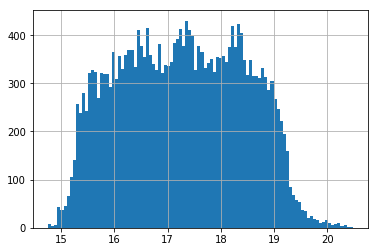

In [10]:
#sanity check of the outliers
dfm.loc[:,"age"].hist(bins=100)

In [11]:
#getting the rows with the null values
dfm[dfm.isnull().any(axis=1)]

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
5,2006,F,NaN,142,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
13,2006,F,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,2006,F,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,2006,M,NaN,135,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,2006,F,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,2006,F,NaN,0,0,0,0,1,0,0,...,0,1,0,0,0,0,2,0,0,0
38,2006,F,NaN,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
41,2006,F,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49,2006,M,NaN,35,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,2006,F,NaN,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [12]:
#filling the missing ages with the median of that grad year
dfm.age = dfm.groupby('gradyear')['age'].apply(lambda x: x.fillna(x.median()))
dfm

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,F,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
5,2006,F,18.675,142,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,2006,F,18.930,72,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
7,2006,M,18.322,17,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2006,F,19.055,52,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2006,F,18.708,39,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [13]:
#sanity check for null values
dfm[dfm.isnull().any(axis=1)]

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs


In [14]:
#normalizing
dfm.iloc[:,4:] = (dfm.iloc[:,4:]-dfm.iloc[:,4:].min())/(dfm.iloc[:,4:].mean()-dfm.iloc[:,4:].min())
dfm

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2006,F,18.801,0,0.000000,3.963535,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.885507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2006,M,18.335,69,0.000000,3.963535,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.754012,0.000000,0.000000
3,2006,F,18.875,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2006,F,18.995,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.665722,0.000000,0.000000,0.000000,0.000000,0.000000,11.367942,16.547159
5,2006,F,18.675,142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.832861,0.000000,0.000000,0.000000,0.000000,0.000000,11.367942,0.000000
6,2006,F,18.930,72,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7.771014,0.000000,0.000000,28.625954,0.000000,0.000000,0.000000,0.000000,0.000000
7,2006,M,18.322,17,0.000000,0.000000,0.000000,6.203474,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,2006,F,19.055,52,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2006,F,18.708,39,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.832861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
#sanity check
print ("The median before filling the missing values is")
print ((df.groupby('gradyear')[['age']].median()))
print ("The median after filling the missing values is")
print ((dfm.groupby('gradyear')[['age']].median()))
#end of preprocessing


The median before filling the missing values is
             age
gradyear        
2006      18.675
2007      17.692
2008      16.734
2009      15.786
The median after filling the missing values is
             age
gradyear        
2006      18.675
2007      17.692
2008      16.734
2009      15.786


In [16]:
#selecting the features for clustering
X = dfm.iloc[:,4:].values
kmeans =KMeans(n_clusters = 5, init='k-means++', max_iter = 300, n_init= 10, random_state = 0)
ykmeans = kmeans.fit_predict(X)
clusters = kmeans.cluster_centers_

for item in ykmeans:
    print(item)

In [17]:
#making a function to highlight the max values
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
#df for cluster center and its features
clust = pd.DataFrame(clusters,columns=dfm.columns[4:].values)
clust.style.apply(highlight_max)

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2.01121,2.00043,1.73938,1.67938,1.94727,2.27348,2.96261,2.31516,2.07552,2.55307,2.28794,6.6417,2.42074,2.45074,8.46728,1.94451,1.54003,0.556622,1.97108,2.99512,1.60579,1.3982,1.22254,0.0662076,4.62379,2.43113,5.52504,2.68363,2.11931,3.76965,9.51503,11.4191,3.14811,2.5718,4.83833,9.746
1,0,7.92707,0,0,0,7.44048,0,0,0,0,3.09725,105.062,7.08215,0,0,2.35202,3.33778,0,0,4.10959,21.4915,0,8.92326,0,28.3979,18.0234,3305.26,0,0,6.73401,0,0,32.591,52.5241,68.2077,0
2,0.910323,0.913898,0.93782,0.942462,0.921152,0.88754,0.84676,0.891022,0.901857,0.873297,0.892493,0.534116,0.88915,0.880823,0.398734,0.919579,0.77773,0.472739,0.906709,0.828882,0.879375,0.903736,0.838908,0,0.706242,0.879095,0.517958,0.869855,0.908039,0.773995,0.342204,0.189356,0.816626,0.857503,0.690578,0.297477
3,0.808789,1.48441,0.693282,0.814356,0.647397,1.32147,0.506915,0.662307,1.81261,0.827555,1.14802,0.866605,0.929703,0.823437,1.19721,1.2986,19.1117,60.1023,1.95187,1.55498,1.1866,1.13574,1.06803,0.723938,1.06903,1.32218,0.819553,0.975127,1.10471,1.118,0.331575,0.603675,1.23737,1.31817,0.614483,0.95833
4,1.71546,1.16971,1.42009,1.3566,1.4685,1.54812,1.25437,1.53773,1.3614,1.39554,1.30203,2.26103,1.00744,1.42549,1.87215,1.20847,1.41023,0.889,1.47618,1.55309,5.074,4.67975,9.22639,62.9976,1.49225,1.30105,1.4593,0.923942,1.1969,1.45832,0.881266,0.954377,1.68375,1.84002,1.59296,2.07279


It looks like cluster 0 is insterested in sports.
another intersetinf fact is that the last columns which can be termed as negative physcolgical impac are in cluster 2. We could target them with positive quotes.